In [21]:
import convml_tt.data.dataset

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from pathlib import Path

%matplotlib inline

In [22]:
t_ds = convml_tt.data.dataset.TripletDataset.load('/home/earlcd/Desktop/mldev/')
t_ds.data_path = Path('/home/earlcd/Desktop/mldata/')
t_ds

{'N_days': 1,
 'N_hours_from_zenith': 1,
 'N_triplets': {'study': 0, 'train': 0},
 'channels': [1, 2, 3],
 'data_path': PosixPath('/home/earlcd/Desktop/mldata'),
 'domain_bbox': [[-60, 10], [-30, 30]],
 'name': 'mldev',
 't_start': datetime.datetime(2020, 1, 18, 0, 0),
 'tile_N': 256,
 'tile_size': 200000.0}

In [6]:
bbox_shape = t_ds.get_domain().get_outline_shape()

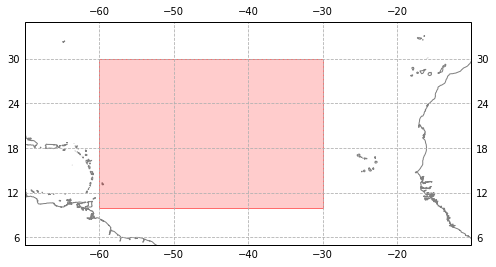

In [13]:
fig = plt.figure(figsize=(8, 6))
projection = ccrs.PlateCarree(central_longitude=-60)
ax = plt.subplot(projection=projection)

try:
    gl = ax.gridlines(linestyle='--', draw_labels=True)
except TypeError:
    gl = ax.gridlines(linestyle='--', draw_labels=False)
ax.coastlines(resolution='10m', color='grey')

def draw_box(geom, color, face_alpha=0.5):

    ax.add_geometries([geom,], crs=ccrs.PlateCarree(), alpha=face_alpha,
              edgecolor=color, facecolor=color)
    ax.add_geometries([geom,], crs=ccrs.PlateCarree(), alpha=face_alpha*2.0,
              edgecolor=color, facecolor='none', linewidth=1.0)
    
draw_box(bbox_shape, color='red', face_alpha=0.2)

ax.set_extent([-70, -10, 5, 35], crs=ccrs.PlateCarree())  # [x0, x1, y0, y1]

#plt.savefig('domain_overview_triplets.pdf')

In [23]:
t_ds.get_dataset_scene(data_path='/home/earlcd/Desktop/mldata/', scene_num=0,)

Exception: Couldn't find any data matching the provided query

In [24]:
%debug

> /home/earlcd/pytools/convml_tt/data/sources/satellite/__init__.py(59)_get_dataset_train_study_split()
     57 
     58             if len(datasets_keys) == 0:
---> 59                 raise Exception("Couldn't find any data matching the provided query")
     60 
     61             # download all the files using the cli (flatting list first...)

ipdb> l
     54                 times=self._times, dt_max=self._dt_max, channels=self.channels,
     55                 cli=cli,
     56             )
     57 
     58             if len(datasets_keys) == 0:
---> 59                 raise Exception("Couldn't find any data matching the provided query")
     60 
     61             # download all the files using the cli (flatting list first...)
     62             print("Downloading channel files...")
     63             keys = [fn for fns in datasets_keys for fn in fns]
     64             fns = cli.download(keys)

ipdb> query
*** NameError: name 'query' is not defined
ipdb> u
> /home/earlcd/pyt